# Car Price Prediction

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
from sklearn.preprocessing import PowerTransformer  # To remove skewness
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
# Reading excel file
df = pd.read_excel("Used_Cars(Cars Price).xlsx")
df

,Unnamed: 0,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,...,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,0,Wagon R,Maruti,Petrol,131125,998.0,Manual,21.79,5.0,Grey,...,Disc,Drum,1675.0,1620.0,3655.0,1340.0,NaN,294000.0,Ahmedabad,7
1,1,Grand i10,Hyundai,Petrol,73875,1197.0,Manual,18.90,5.0,White,...,Disc,Drum,1520.0,1660.0,3765.0,NaN,165.0,480000.0,Ahmedabad,6
2,2,Vento,Volkswagen,Diesel,97922,1498.0,Manual,22.27,5.0,White,...,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3
3,3,S-Presso,Maruti,Petrol,24230,998.0,Manual,21.70,5.0,Red,...,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,NaN,422000.0,Ahmedabad,2
4,4,Wagon R,Maruti,Petrol,41174,998.0,Automatic,20.51,5.0,Grey,...,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,12603,Rover Freelander 2,Land,Diesel,80000,2179.0,Automatic,12.39,5.0,White,...,Disc,Disc,1740.0,2195.0,4500.0,NaN,181.0,1800000.0,Pune,7
12604,12604,RS5,Audi,Petrol,55000,2894.0,Automatic,11.05,4.0,Red,...,Ventilated Disc,Ventilated Disc,1358.0,2029.0,4723.0,2155.0,250.0,3500000.0,Pune,10
12605,12605,Grand i10 Nios,Hyundai,CNG,40000,1197.0,Manual,0.00,5.0,NaN,...,Disc,Drum,1520.0,1680.0,3805.0,NaN,NaN,750000.0,Pune,1
12606,12606,Xcent,Hyundai,CNG,15000,1197.0,Manual,0.00,5.0,NaN,...,Disc,Drum,1520.0,1660.0,3995.0,NaN,NaN,725000.0,Pune,0


Here, I'm importing the excel-formatted data set and putting it in a dataframe (df) for later use. Here, we can see the dataset's first five rows and its last five rows. The dataframe has 21 columns and 12608 rows. Both numerical and category data are included in the collection. The dataframe contains both dependent and independent variables. This is a "Regression Problem" since our goal variable, "Car Price," stores the cost of used automobiles and is continuous in nature.

# Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
pd.set_option("display.max_rows",None)

Displaying maximum rows and columns present in the dataset.

In [4]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Diapaying the dataframe

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,NaN,294000.0,Ahmedabad,7
1,Grand i10,Hyundai,Petrol,73875,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,NaN,165.0,480000.0,Ahmedabad,6
2,Vento,Volkswagen,Diesel,97922,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3
3,S-Presso,Maruti,Petrol,24230,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,NaN,422000.0,Ahmedabad,2
4,Wagon R,Maruti,Petrol,41174,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4


##### Since "Unnamed: 0" was solely used to store index data and was not a suitable feature column for prediction, it was removed from the dataset. The dataset's first five rows are observable.

In [5]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 12608 rows and 20 columns in our dataframe


##### The dataset contains 12608 rows and 20 columns. Out of 20 columns 19 are independent variables and remaining one is our target variable "Car_price" which is dependent in nature.

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Model', 'Brand', 'Fuel_type', 'Running_in_kms', 'Engine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'height', 'width',
       'length', 'Weight', 'top_speed', 'Car_Price', 'Location', 'Car_age'],
      dtype='object')


##### These are the columns present in our dataset.

In [7]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Model,274
Brand,35
Fuel_type,5
Running_in_kms,4577
Engine_disp,143
Gear_transmission,2
Milage_in_km/ltr,478
Seating_cap,8
color,195
Max_power,376


Above are the number of unique values present in each of the columns of the dataset.

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              12605 non-null  object 
 1   Brand              12608 non-null  object 
 2   Fuel_type          12608 non-null  object 
 3   Running_in_kms     12608 non-null  int64  
 4   Engine_disp        12548 non-null  float64
 5   Gear_transmission  12608 non-null  object 
 6   Milage_in_km/ltr   12579 non-null  float64
 7   Seating_cap        12504 non-null  float64
 8   color              12334 non-null  object 
 9   Max_power          12463 non-null  float64
 10  front_brake_type   12394 non-null  object 
 11  rear_brake_type    12393 non-null  object 
 12  height             12354 non-null  float64
 13  width              12353 non-null  float64
 14  length             12354 non-null  float64
 15  Weight             6534 non-null   float64
 16  top_speed          829

# Checking null values in the dataset

In [13]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/12608)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/126.08     # 12608/100 = 126.08
df_null

,Count of Null Values,% of Null Values
Weight,6074,48.175761
top_speed,4316,34.232234
color,274,2.173223
width,255,2.022525
height,254,2.014594
length,254,2.014594
rear_brake_type,215,1.705266
front_brake_type,214,1.697335
Max_power,145,1.150063
Seating_cap,104,0.824873


Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.

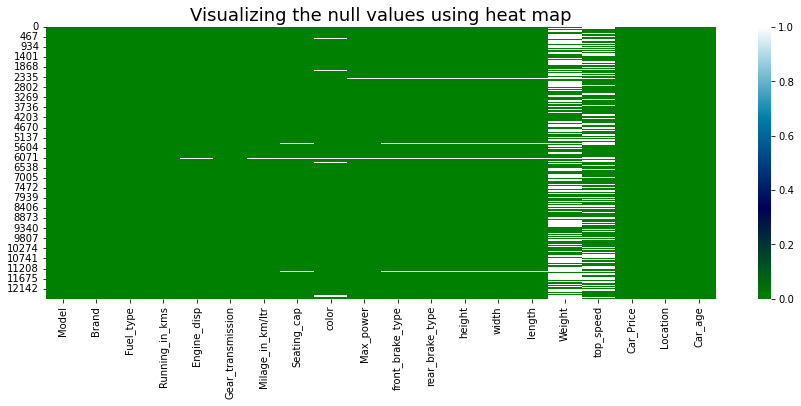

In [14]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

# Treating null values using imputation techniqies

In [15]:
df.skew()

Running_in_kms      7.906142
Engine_disp         1.895318
Milage_in_km/ltr   -0.511076
Seating_cap         2.444332
Max_power           2.939518
height              0.955643
width               0.800815
length              0.434823
Weight              1.032898
top_speed           0.896381
Car_Price           9.610453
Car_age             0.723524
dtype: float64

In [16]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "Weight" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'Weight' is:",df["Weight"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())
print("The mode value of 'Model' is:",df["Model"].mode())

The mean value of 'length' is: 4083.963088878096

The median value of 'Engine_disp' is: 1248.0
The median value of 'Milage_in_km/ltr' is: 19.6
The median value of 'Max_power' is: 86.8
The median value of 'height' is: 1520.0
The median value of 'width' is: 1700.0
The median value of 'Weight' is: 1520.0
The median value of 'top_speed' is: 169.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object
The mode value of 'Model' is: 0    Swift
dtype: object


These are the mean, median and mode values. These values will be filled in the place of missing values while we impute them.

In [17]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','width','length','Weight','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color','Model']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [18]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Price            0
Location             0
Car_age              0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.

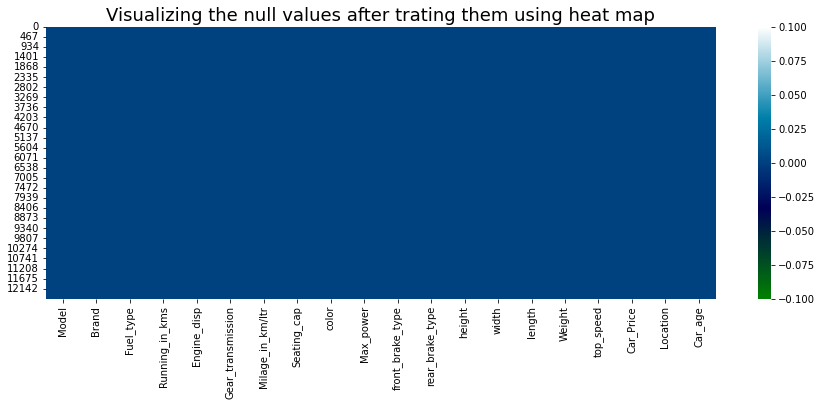

In [19]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [20]:
# Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age


It seems that there are no spaces in the target column.

In [21]:
# Checking the uniqueness of target column
df["Car_Price"].unique()

array([ 294000.,  480000.,  711000., ...,   52000.,   93603., 1415000.])

These are the unique values present in the target column.

Great!!! We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.

In [22]:
# Let's check the dataframe after cleaning 
df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,Ahmedabad,7
1,Grand i10,Hyundai,Petrol,73875,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,Ahmedabad,6
2,Vento,Volkswagen,Diesel,97922,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3
3,S-Presso,Maruti,Petrol,24230,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,Ahmedabad,2
4,Wagon R,Maruti,Petrol,41174,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4


In [23]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (12608, 20)


After cleaning the data we have left with 20 columns and 12608 rows.

# Description of Dataset

In [24]:
# Statistical summary of dataset
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,Car_Price,Car_age
count,1.260800e+04,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,1.260800e+04,12608.000000
mean,5.772259e+04,1436.207249,19.556908,5.218036,100.130872,1563.792989,1718.849540,4083.963089,1603.173065,171.672430,7.709751e+05,6.121352
std,4.027723e+04,494.852497,4.220344,0.693750,44.445694,111.054497,125.361262,398.610518,319.636585,21.392996,1.080141e+06,3.143337
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,1000.000000,86.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1675.250000,3765.000000,1510.000000,163.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,1520.000000,169.000000,5.150000e+05,6.000000
75%,7.586225e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,1580.000000,175.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3350.000000,327.000000,3.080000e+07,35.000000


##### The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things:
 **The counts of every column is same which means there are no missing values present in the dataset as we are already treated them .
 
 **The min value for "Engine_disp", "Milage_in_km/ltr" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "Weight", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.
 
 **The mean value is greater than the median(50%) in the columns such as "Engine_disp", "Max_power", "length", "Weight", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right.
 
 **In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.
 
 **We need to remove these outliers and skewness except target column using appropriate methodsbefore building our machine learning models.


# Separating numerical and categorical columns

In [25]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

Numerical columns present in the dataset are:
 ['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'Car_Price', 'Car_age']


These are the object data type and numerical type columns present in the dataset.

Now it's time to visualize the data.

# Data Visualization

### Univariate Analysis

#### Plotting categorical Variables

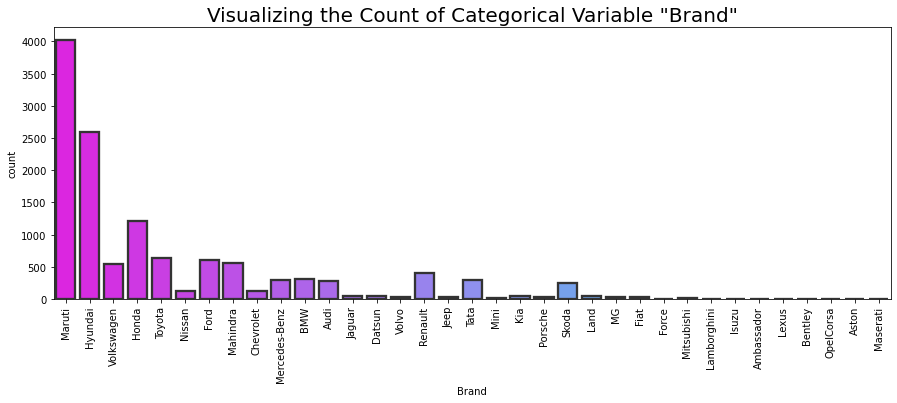

In [26]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:

The brand count for autos is seen in the count plot above. According to the graph, we may infer that Maruti and Hyundai are the two automobile brands that we have the most of.

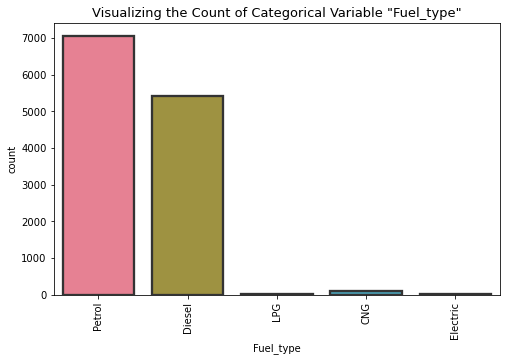

In [27]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="husl", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:

The number of fuel kinds used by the cars is shown in the above plot. Petrol is the fuel used by the most cars, followed by diesel. And a very small number of automobiles run on CNG, LPG, or electricity.

Manual       9608
Automatic    3000
Name: Gear_transmission, dtype: int64


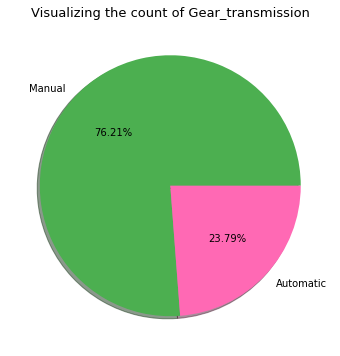

In [28]:
# Visualizing the count of Gear_transmission of the car 
print(df["Gear_transmission"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_transmission'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_transmission",fontsize=13)
plt.show()

### Observations:

The above plot shows the number of transmissions; from this graph, we can see that just 23% of cars have automatic transmissions, while 76% of cars have manual transmissions.

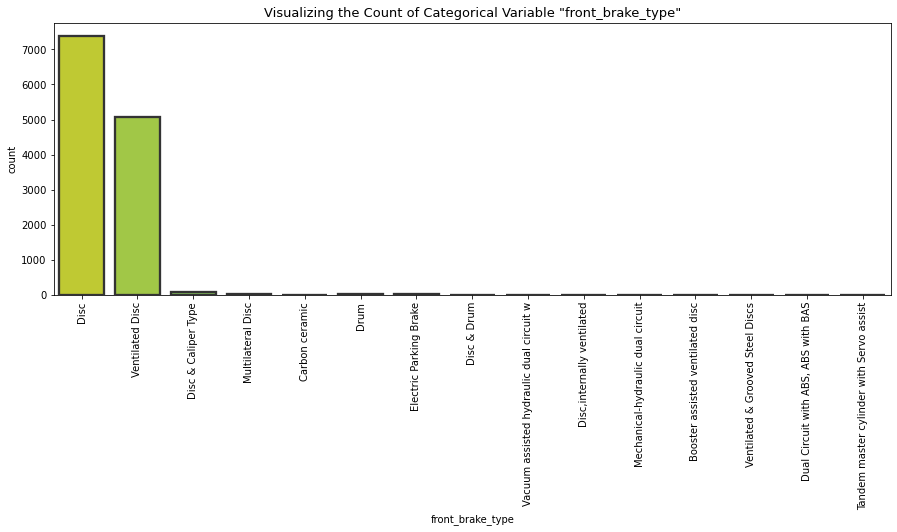

In [29]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="viridis_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:

The cars with Disc and Ventilated Disc type brake system utilised for front-side wheels are having high count compared to other brake types, as seen by visualising the above count plot.

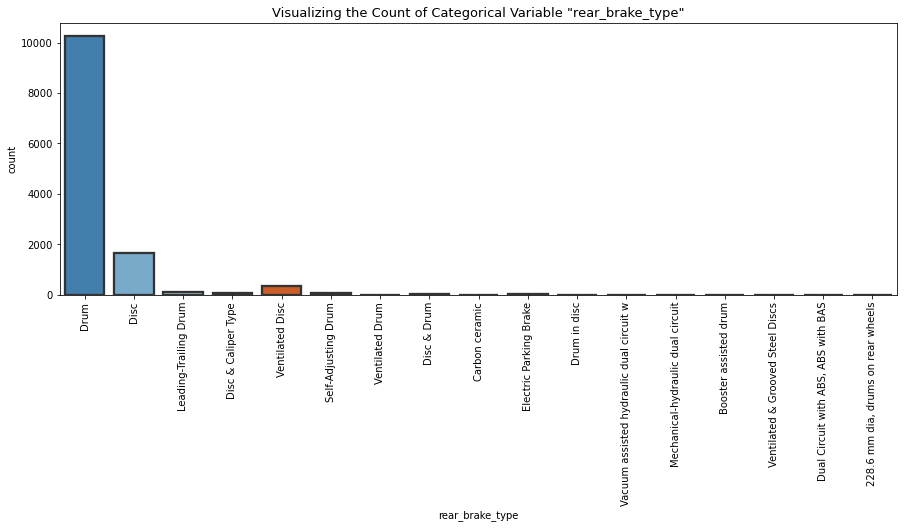

In [30]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:

When compared to other types of rear brakes, the cars with drum-style brake systems utilised on the backside wheels have a higher count—roughly 10,000—than those with other types of rear brakes.

Delhi_NCR    1490
Bangalore    1486
Mumbai       1478
New_Delhi    1473
Pune         1239
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: Location, dtype: int64


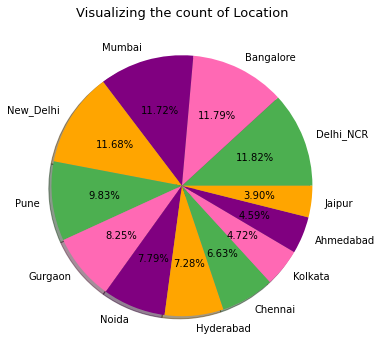

In [31]:
# Visualizing the count of Location of the car 
print(df["Location"].value_counts())
labels='Delhi_NCR','Bangalore','Mumbai','New_Delhi','Pune','Gurgaon','Noida','Hyderabad','Chennai','Kolkata','Ahmedabad','Jaipur'
colors = ["#4CAF50", "hotpink","purple","orange"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Location",fontsize=13)
plt.show()

### Observations:

By looking at the above count plot we can get to know that the cars from the city Delhi_NCR, Bangalore, Mumbai and New_Delhi have high counts which are almost similar. And the other locations also have no much difference in the counts.

# Distribution of skewness:

#### Plotting Numerical Variables:

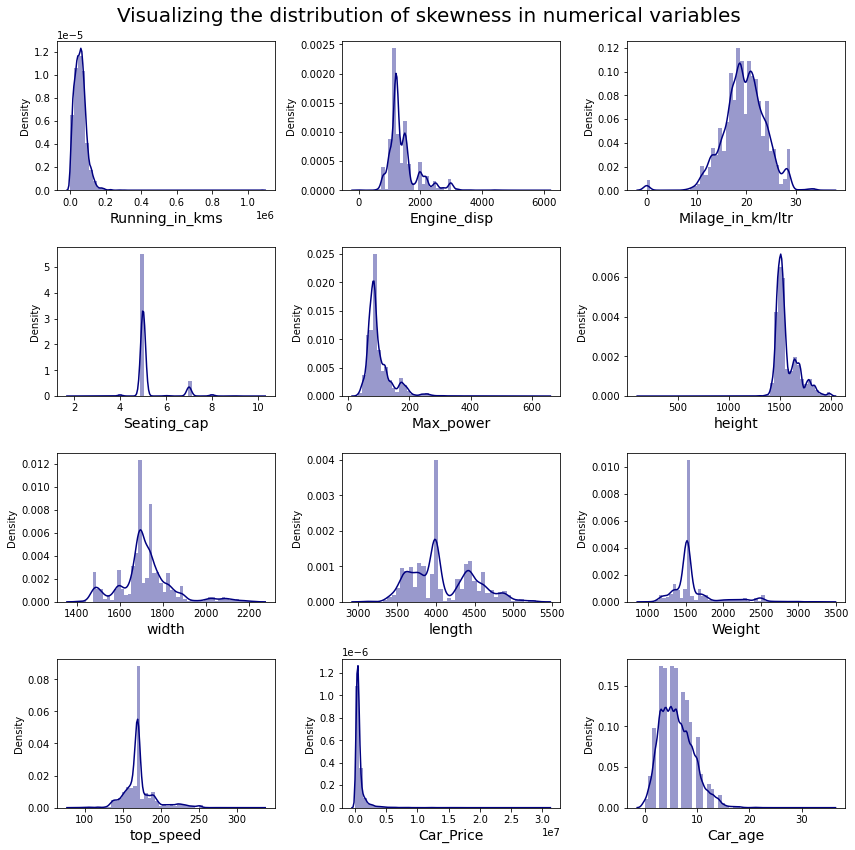

In [32]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Observations:

Above plot shows how the data has been distributed in each of the columns.

From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.

Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "Weight", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).

The data in the column "height" skewed to left since the mean values is less than the median.

We need to remove this skewness before building our machine learning models

# Bivariate Analysis

### Visualizing Categorical Variables vs Car_Price

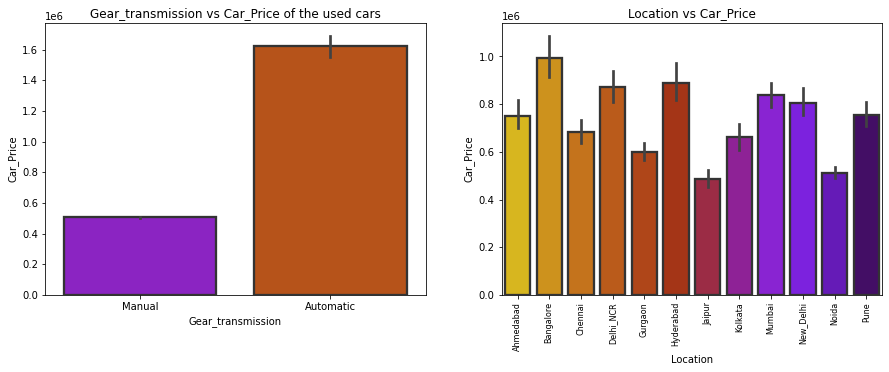

In [33]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_transmission'],df['Car_Price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_transmission vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Location'],df['Car_Price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Location vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:

##### -Car_Price vs Gear_transmission:  From the bar plot we can observe that the cars which have Automatic gear transmission system are having high price compared to the cars which have Manual gear transmission system.

##### Car_Price vs Location: From the second plot we came to know that the old cars from the city Bangalore have higher price followed by Hyderabad and Delhi_NCR. And the cars from the cities Jaipur, Noida, Gurgaon etc have very less price.

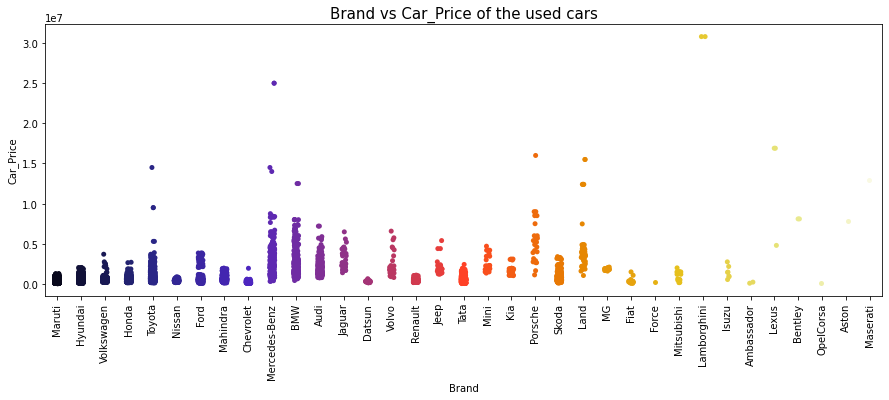

In [34]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:

#### Car_Price vs Brand: The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Mercedes_Benz and BMW brand have high price compared to other brands.


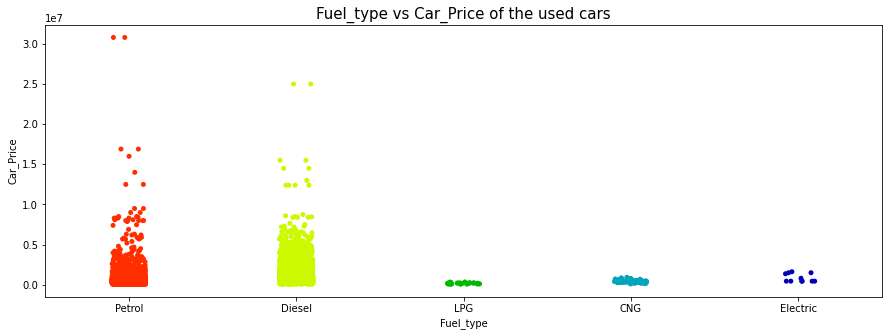

In [35]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_Price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_Price of the used cars',fontsize=15)
plt.show()

### Observations:

##### Car_Price vs Fuel_type: From the graph we can conclude that more number of cars are using Petrol and Diesel fuels and these cars have wide range of price from minimum to maximum. And very few of the cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.

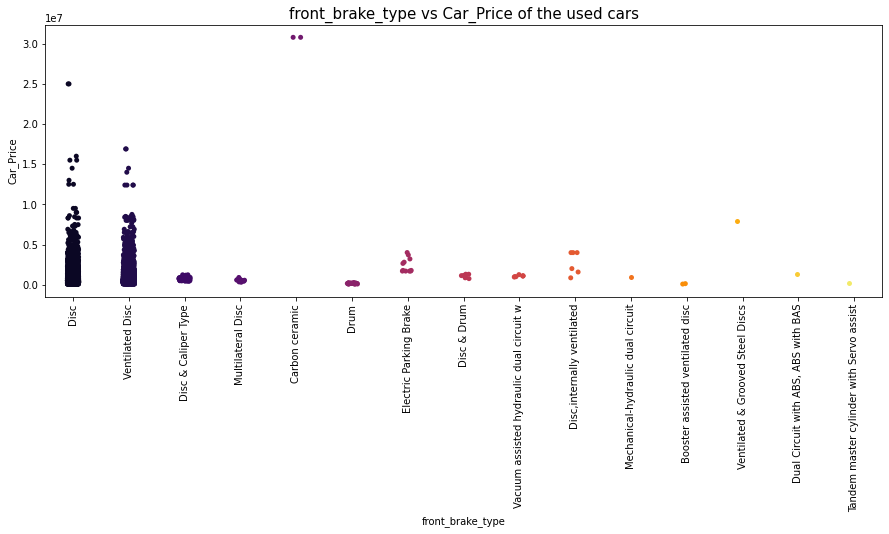

In [36]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:

##### Car_Price vs front_brake_type: Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

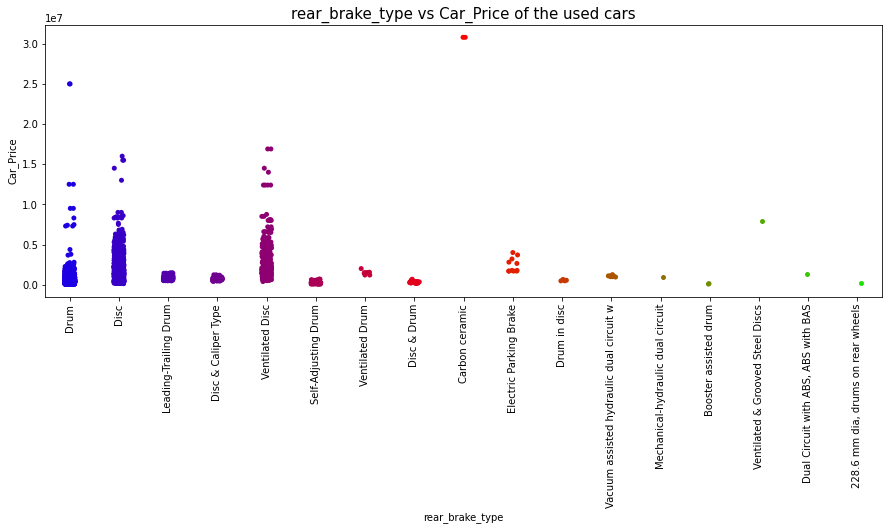

In [37]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:

##### Car_Price vs rear_brake_type: The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc or Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.


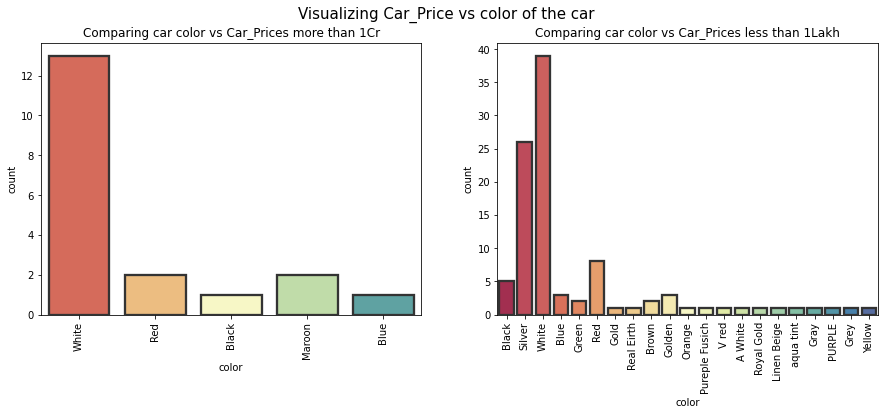

In [38]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

#### Observations:

##### Car_Price vs color: The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. The white color cars are more expensive compared to the cars with other colors.


##### The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price.

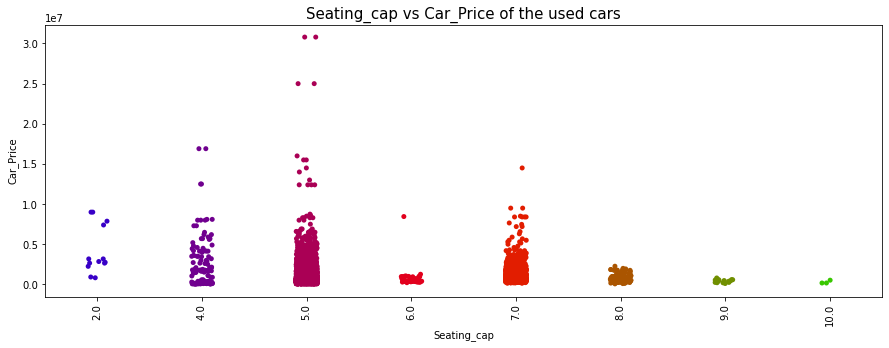

In [39]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:

#### Car_Price vs Seating_cap: Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars. And only 3 cars are observed with the seating capacity of 10.

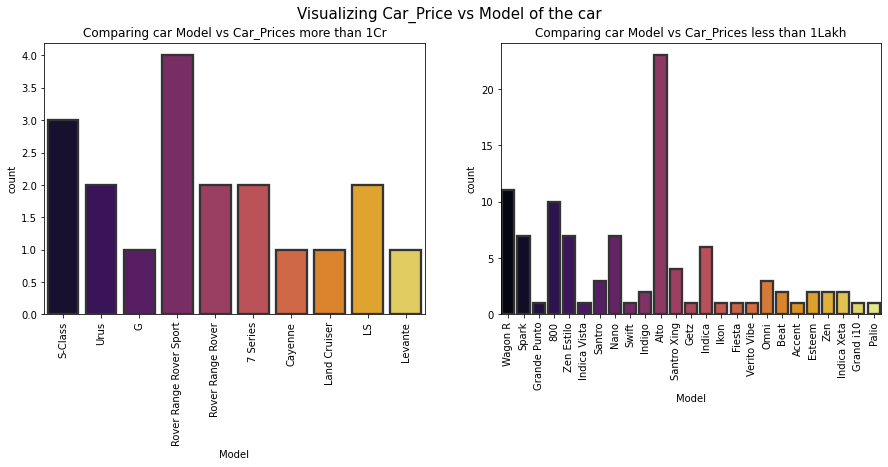

In [40]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

### Observations:

##### Car_Price vs Model: The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The Rover Range Sport model are expensive compared to other models.

##### The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model Alto have very less price.

# Visualizing Numerical Variables vs Car_Price

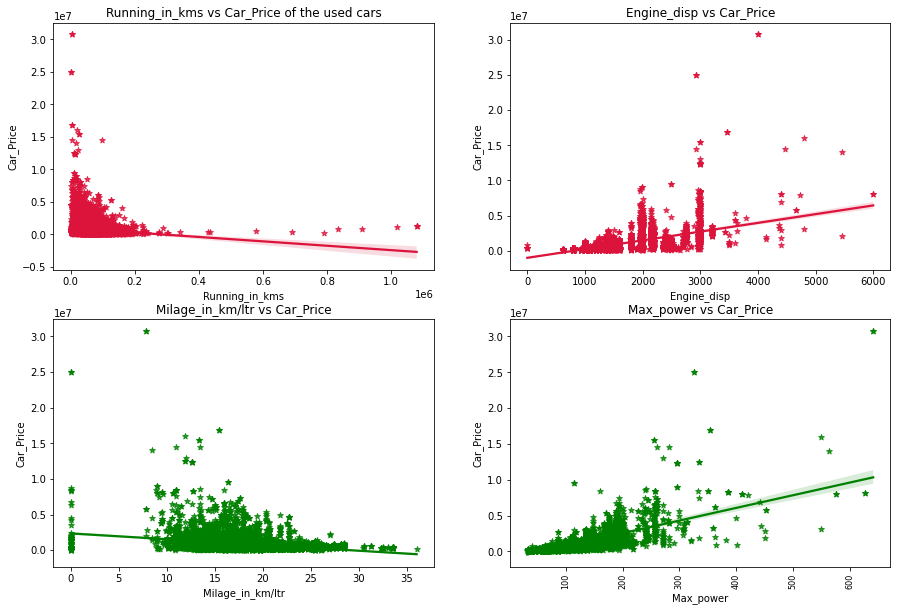

In [41]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Running_in_kms'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Running_in_kms vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:

Car_Price vs Running_in_kms: From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.

Car_Price vs Engine_disp: There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.

Car_Price vs Milage_in_km/ltr: The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price nad milage also some used cars have 0 milage which is unrealistic.

Car_Price vs Max_power: Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.


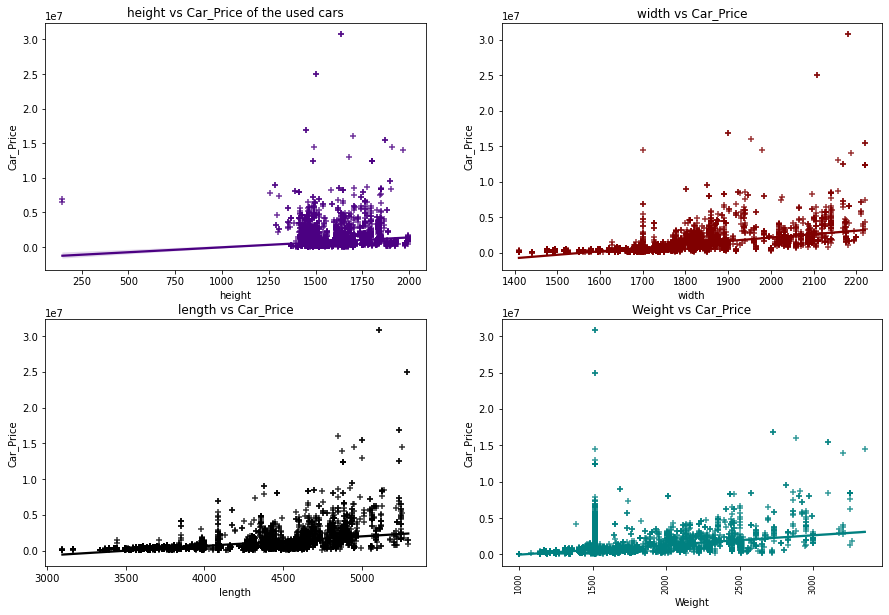

In [42]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Weight' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Weight'],y= df['Car_Price'],marker="+",color='teal')
plt.title('Weight vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:

Car_Price vs height: From the graph it is clear that the car price is not strongly related with the height of the car, we can say the cars having height in the range of 1300 mm to 1800 mm have somewhat high price.

Car_Price vs width: The graph shows there is some positive linear relation between car price and width of the car, so the cars having width in the range of 1700mm to 2200mm have high price. So we can conclude as the width of the car increases, the price of the car also goes on increasing.

Car_Price vs length: There is some positive linear relation between car price and length of the cars. As the length of the cars increases, the price of the cars also increases. The cars that are having the length above 4250mm have high price.

Car_Price vs Weight: There is some positive linear relation between price of the car and weight. The cars with weight 1500kg have high price.


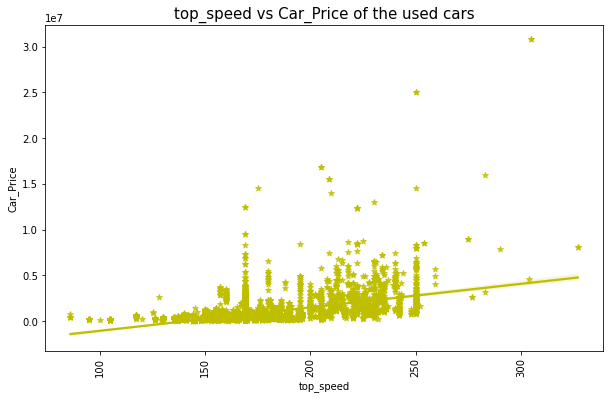

In [43]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],marker="*",color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:

Car_Price vs top_speed: From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 120 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases.


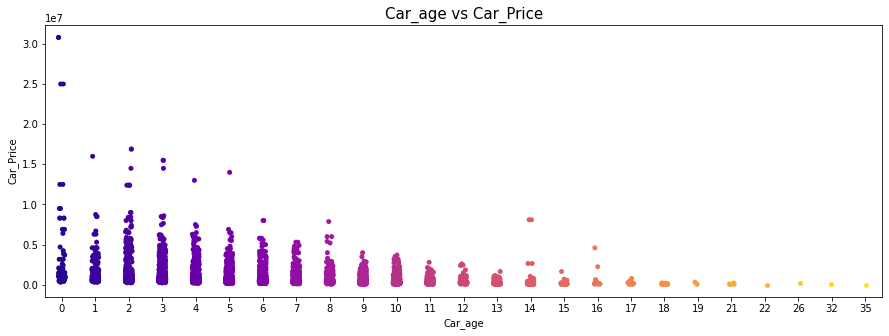

In [44]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

### Observations:

Car_Price vs Car_age: From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.


##### The relationship between the independent factors and the dependent variable, which is the target column "Car Price," has been examined thus far. Now let's compare each independent variable to others and examine the relationship between the two.

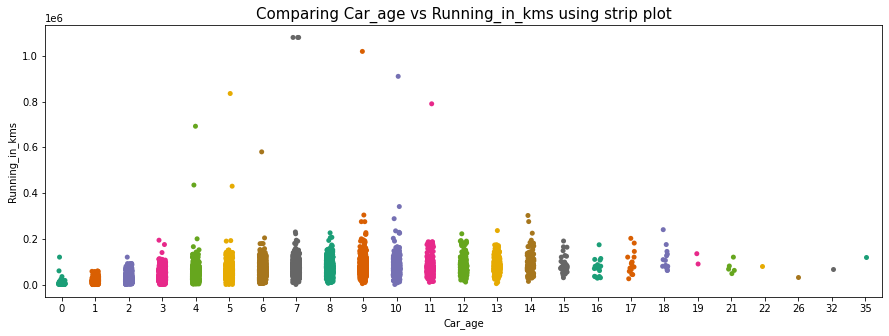

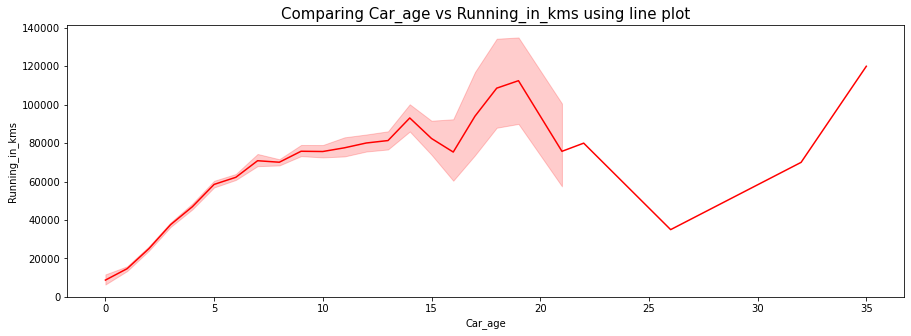

In [45]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Running_in_kms using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Running_in_kms', data = df, color = "r")
plt.title("Comparing Car_age vs Running_in_kms using line plot",fontsize=15)
plt.show()
plt.show()

### Observations:

Car_age vs Running_in_kms: The above two graphs represents car_age vs Running in kms. The cars which have their age from 2 years to 16 years have highly used. That is the running kms for these cars are around 1 lakh kms.


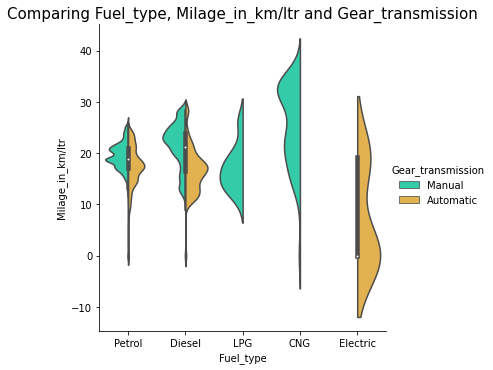

In [46]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_transmission",fontsize=15)
plt.show()

### Observations:

According to gear transmission, the above violin plot shows the relationship between mileage (in km/ltr) and fuel type. As we can see, manual-transmission cars that run on CNG get better gas mileage than vehicles that run on other fuels.

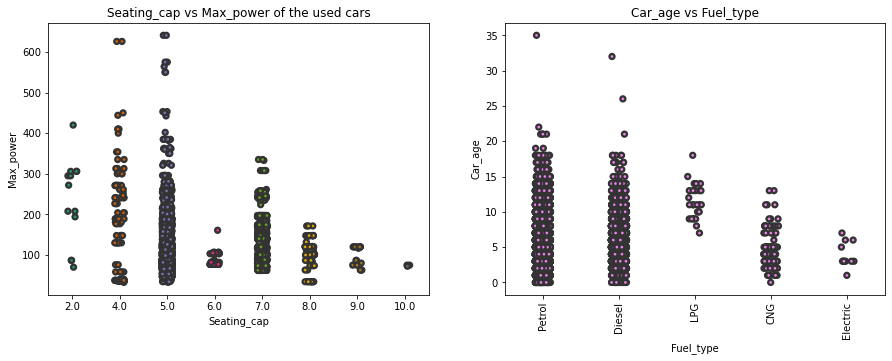

In [47]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()


### Observations:

Seating_cap vs Max_power: The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.

Fuel_type vs Car_age: The cars which are using Patrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel.


# Identifying the outliers in the dataset using boxplots

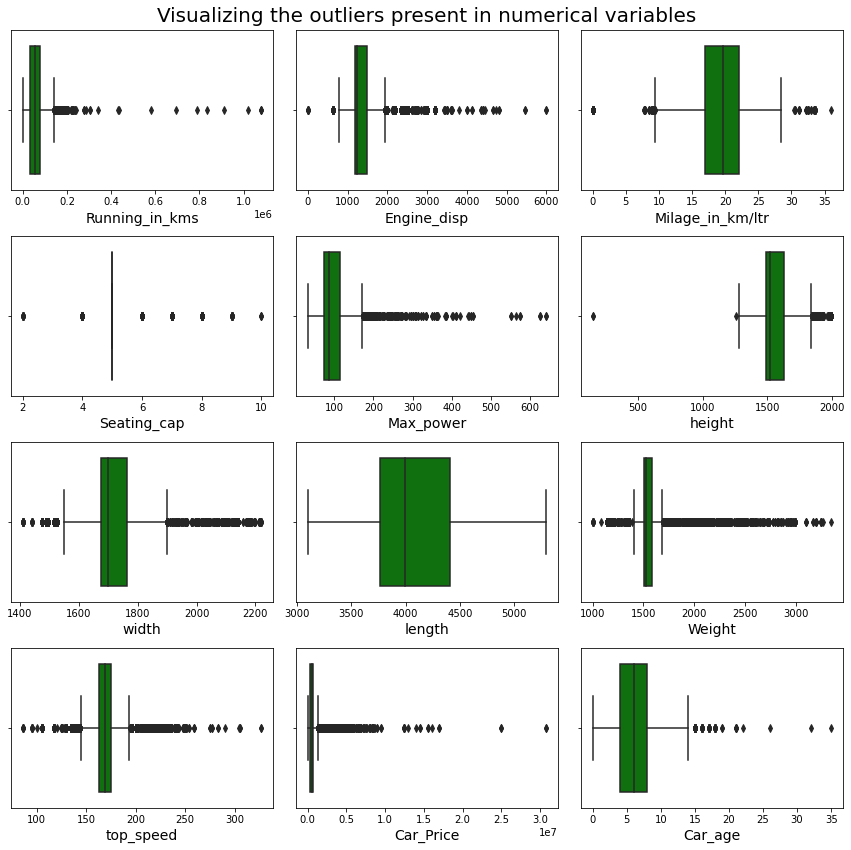

In [52]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above box plots we can observe all the columns contains the outliers except "length".

Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.


# Removing outliers from dataset

### i) Zscore method

In [53]:
# Features containing outliers
features = df[['Running_in_kms','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','height','width','Weight','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

I have listed down the numerical features having outliers and using zscore method to get rid off the outliers in these columns.

In [54]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,Ahmedabad,7
1,Grand i10,Hyundai,Petrol,73875,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,Ahmedabad,6
2,Vento,Volkswagen,Diesel,97922,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3
3,S-Presso,Maruti,Petrol,24230,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,Ahmedabad,2
4,Wagon R,Maruti,Petrol,41174,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [55]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (12608, 20)
Shape of dataset after removing outliers: (11481, 20)


In [56]:
# Checking the data loss after removing outliers
data_loss = (12608-11481)/12608*100
data_loss

8.938769035532996

By using Zscore I am losing around 8.9% of data which is acceptable as the acceptable range of data loss is less than 10. Let's try to remove outliers using IQR method and check the data loss.

### ii) IQR (InterQuartile Range) method

In [57]:
# Removing outliers using IQR method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of dataset using IQR method.

In [58]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (6464, 20)


In [59]:
# Checking the the data loss after removing outliers
data_loss = (12608-6464)/12608*100
data_loss

48.73096446700508

Using IQR method the data loss is 48.7%. So, considering Zscore method.

# Checking for skewness in the data

In [60]:
# Checking the skewness
new_df.skew()

Running_in_kms      0.553747
Engine_disp         1.323144
Milage_in_km/ltr    0.094848
Seating_cap         3.187292
Max_power           1.392424
height              1.275943
width               0.358475
length              0.415214
Weight              1.908091
top_speed           0.966678
Car_Price           3.537058
Car_age             0.489995
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr", "width", "length", and "Car_age". Let's remove skewness in the remaining columns.

# Removing skewness using yeo-johnson method

In [61]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Engine_disp","Seating_cap","Max_power","height","Weight","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

Using power transformation method to remove the skewness in the data.

In [62]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

,Running_in_kms,Engine_disp,Seating_cap,Max_power,height,Weight,top_speed
0,2.130695,-1.195810,-0.19967,-1.002315,7.494005e-16,-1.079309,0.030349
1,0.676649,-0.323042,-0.19967,-0.221629,-1.387779e-16,0.027186,-0.215359
2,1.327903,0.627849,-0.19967,0.729578,-5.828671e-16,0.991807,0.653755
3,-1.041906,-1.195810,-0.19967,-1.002315,1.665335e-16,-2.600515,0.030349
4,-0.366963,-1.195810,-0.19967,-1.005376,8.604228e-16,-1.006562,-1.096125


In [63]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.066951
Engine_disp      -0.019124
Seating_cap      -2.369892
Max_power        -0.017556
height            0.000000
Weight           -0.120538
top_speed        -0.049855
dtype: float64

We can see that all columns except "Seating cap" have almost completely lost their skewness. Although the skewness in this column has been somewhat lessened, it appears that the data in this column may still be significant, thus it is being left alone. We may remove the column "height" because it has zero skewness, which means that its only unique item is 0 across the whole dataset.

In [64]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

## Encoding the categorical columns using Label Encoder Method

In [66]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoded the categorical columns using label encoder.

In [67]:
# Displaying the categorical columns after encoding 
new_df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Location
0,176,17,4,1,64,1,4,0
1,85,8,4,1,163,1,4,0
2,169,26,1,1,163,6,4,0
3,136,17,4,1,125,6,4,0
4,176,17,4,0,64,6,4,0


The categorical columns(object datatype) have been converted into numerical columns by using label encoding.

# Correlation between the label and features using HEAT map

In [68]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Car_Price,Location,Car_age
Model,1.000000,0.101626,-0.057383,0.041264,0.024168,0.090295,-0.014236,0.059382,0.038208,0.020787,-0.043947,-0.063119,0.065541,-0.066075,0.175713,0.027510,-0.067642,0.011473,0.025251
Brand,0.101626,1.000000,-0.011471,0.000461,-0.099083,0.067991,0.102649,0.092918,-0.008890,-0.198882,0.033291,-0.021708,-0.122908,-0.016548,-0.045513,-0.198261,-0.130392,0.019937,-0.076979
Fuel_type,-0.057383,-0.011471,1.000000,-0.366456,-0.466931,0.010464,-0.322595,-0.189900,-0.022924,-0.277132,-0.072522,0.159986,-0.445961,-0.377342,-0.435803,-0.209243,-0.264371,0.014044,0.002961
Running_in_kms,0.041264,0.000461,-0.366456,1.000000,0.235234,0.112165,0.009768,0.084825,0.047637,0.088250,0.125878,-0.011993,0.098911,0.168742,0.202939,0.087301,-0.209364,0.002628,0.533645
Engine_disp,0.024168,-0.099083,-0.466931,0.235234,1.000000,-0.307012,-0.459934,0.258043,-0.021936,0.888419,0.035718,-0.352147,0.762580,0.834068,0.709730,0.622660,0.539021,-0.022800,0.065863
Gear_transmission,0.090295,0.067991,0.010464,0.112165,-0.307012,1.000000,0.289495,0.016509,0.026381,-0.419817,0.035918,0.220118,-0.316690,-0.330819,-0.213069,-0.353655,-0.496451,0.024063,0.117629
Milage_in_km/ltr,-0.014236,0.102649,-0.322595,0.009768,-0.459934,0.289495,1.000000,-0.188520,-0.004285,-0.497127,0.038698,0.197773,-0.283154,-0.399172,-0.385836,-0.255270,-0.255417,0.027559,-0.233646
Seating_cap,0.059382,0.092918,-0.189900,0.084825,0.258043,0.016509,-0.188520,1.000000,0.013384,0.170303,-0.010128,-0.062099,0.200896,0.254421,0.341320,-0.076168,0.103517,-0.019290,-0.059635
color,0.038208,-0.008890,-0.022924,0.047637,-0.021936,0.026381,-0.004285,0.013384,1.000000,-0.033060,-0.006460,0.003142,-0.019912,-0.033134,-0.017535,-0.050544,-0.033909,0.005544,0.000469
Max_power,0.020787,-0.198882,-0.277132,0.088250,0.888419,-0.419817,-0.497127,0.170303,-0.033060,1.000000,-0.034209,-0.388862,0.781865,0.835939,0.662255,0.713394,0.631624,-0.016553,-0.047097


The above method gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

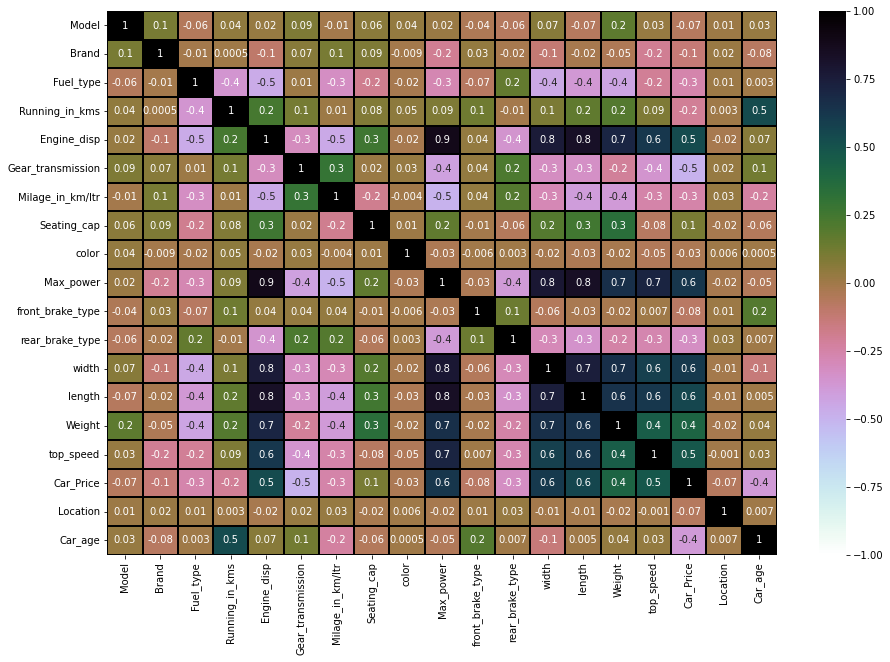

In [69]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

##### This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.

The columns "Max_power", "width", "length", "Engine_disp", "top_speed" and "Weight" have strong positive relation with the target variable "Car_Price".

The other columns like "Gear_transmission", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km" etc are highly negatively correlated with the target variable "Car_Price".

We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.


In [70]:
# Checking the positive and negative relation between label and features 
cor['Car_Price'].sort_values(ascending=False)

Car_Price            1.000000
Max_power            0.631624
width                0.611503
length               0.557461
Engine_disp          0.539021
top_speed            0.481739
Weight               0.408783
Seating_cap          0.103517
color               -0.033909
Model               -0.067642
Location            -0.069442
front_brake_type    -0.083656
Brand               -0.130392
Running_in_kms      -0.209364
Milage_in_km/ltr    -0.255417
Fuel_type           -0.264371
rear_brake_type     -0.326163
Car_age             -0.389943
Gear_transmission   -0.496451
Name: Car_Price, dtype: float64

Here we can observe the positive and negative correlation between features and label in the descending order.

## Visualizing the correlation between label and features using bar plot

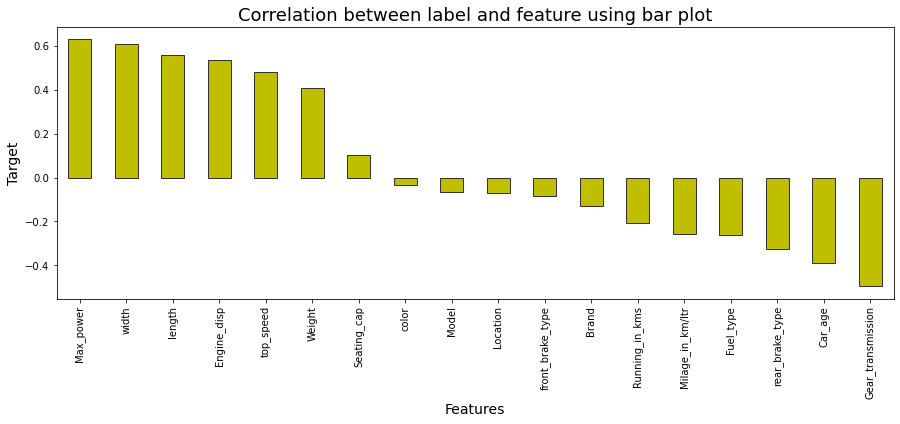

In [71]:
plt.figure(figsize=(15,5))
new_df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='y',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

The positive and negative association between the label and features may be seen clearly in the bar plot. In this case, the column "colour" has a lower correlation with the label than the others; but, for the time being, let's leave it in place.

# Separating the feature and label into x and y

In [72]:
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

I have separated both dependent and independent variables.

In [74]:
# Dimension of x and y
x.shape, y.shape

((11481, 18), (11481,))

# Feature Scaling Using StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Location,Car_age
0,1.119280,0.475229,0.821974,2.130695,-1.195810,0.511787,0.470290,-0.19967,-0.939515,-1.002315,-0.810606,0.253097,-0.790362,-1.073736,-1.079309,0.030349,-1.63345,0.336469
1,-0.371963,-0.853907,0.821974,0.676649,-0.323042,0.511787,-0.340682,-0.19967,1.064776,-0.221629,-0.810606,0.253097,-0.415408,-0.765969,0.027186,-0.215359,-1.63345,0.000351
2,1.004569,1.804364,-1.208525,1.327903,0.627849,0.511787,0.604985,-0.19967,1.064776,0.729578,1.242011,0.253097,-0.049827,0.982707,0.991807,0.653755,-1.63345,-1.008003
3,0.463788,0.475229,0.821974,-1.041906,-1.195810,0.511787,0.445035,-0.19967,0.295453,-1.002315,1.242011,0.253097,-1.727747,-1.325546,-2.600515,0.030349,-1.63345,-1.344121
4,1.119280,0.475229,0.821974,-0.366963,-1.195810,-1.953939,0.111106,-0.19967,-0.939515,-1.005376,1.242011,0.253097,-1.962093,-1.230418,-1.006562,-1.096125,-1.63345,-0.671885


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.


As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.


# Checking Variance Inflation Factor (VIF)

In [76]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.160199,Model
1,1.237401,Brand
2,3.374246,Fuel_type
3,1.777052,Running_in_kms
4,8.982687,Engine_disp
5,1.344795,Gear_transmission
6,3.203533,Milage_in_km/ltr
7,1.334930,Seating_cap
8,1.013074,color
9,10.028493,Max_power


We can observe the column "Max_Power" has VIF above 10 that means it is causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns.

In [77]:
# Dropping Max_power column as it contains high VIF value
x.drop(["Max_power"],axis=1,inplace=True)

In [78]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.153305,Model
1,1.138006,Brand
2,3.146660,Fuel_type
3,1.777048,Running_in_kms
4,6.090144,Engine_disp
5,1.304208,Gear_transmission
6,3.200010,Milage_in_km/ltr
7,1.329078,Seating_cap
8,1.013063,color
9,1.099920,front_brake_type


Great!!! Now we are overcome with the multicollinearity issue as the VIF values are less than 10 in all the columns.

#### I have successfully completed preprocessing and data cleaning in the dataset. Now it is time to build my machine learning models.

# Building Machine Learning Models

#### Finding the Best Random State and Accuracy

In [79]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9639146945035953  on Random_state  114


#### Great!!! so with the help of random state selection process we have found our random state to be 114 amongst 1-1000 with best accuracy as 96.39% using Random Forest Regressor.

### Feature Importance

In [80]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
width,0.273
Engine_disp,0.223
Car_age,0.190
Gear_transmission,0.092
top_speed,0.052
Running_in_kms,0.049
length,0.034
Brand,0.019
Model,0.015


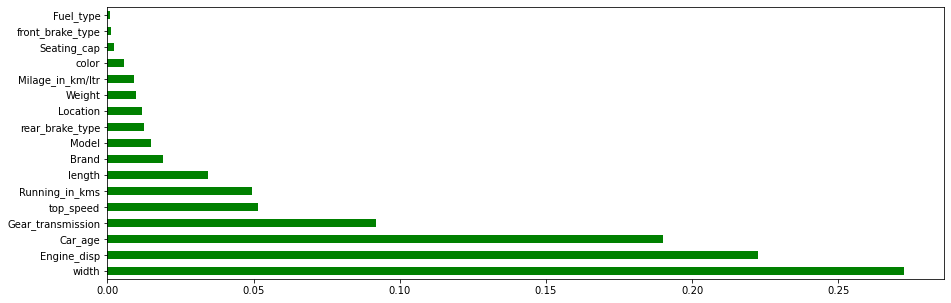

In [81]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here, we can use RandomForestClassifier to list each column's relevance based on how important it was in predicting our label. Here, the column "Engine disp" makes a larger contribution to the forecast, indicating the importance of this attribute for the predictions.

# Creating new train test split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=114)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

# ML Regression Algorithms with Evaluation Metrics

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## i) Decision Tree Regressor

R2_Score: 92.03532350705957
Mean Absolute Error: 64324.67343976778
Mean Squared Error: 20787428786.647316
Root Mean Squared Error: 144178.4615906527

Cross Validation Score: 89.16926307609157

R2 Score - Cross Validation Score is 2.8660604309680053


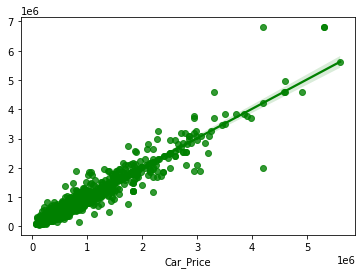

In [85]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 92.45%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.


## ii) Random Forest Regressor

R2_Score: 96.38392775166326
Mean Absolute Error: 51040.43504070772
Mean Squared Error: 9437777468.588747
Root Mean Squared Error: 97148.22421737181

Cross Validation Score: 93.09928032786799

R2 Score - Cross Validation Score is 3.2846474237952776


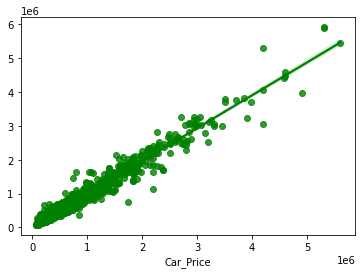

In [86]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 96.38%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## iii) Extra Trees Regressor

R2_Score: 96.13461514204023
Mean Absolute Error: 49339.17720657959
Mean Squared Error: 10088471583.1263
Root Mean Squared Error: 100441.38381726081

Cross Validation Score: 93.83020474641602

R2 Score - Cross Validation Score is 2.304410395624217


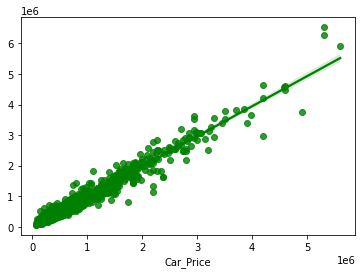

In [87]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 96.13%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.


## iv) GradientBoosting Regressor

R2_Score: 94.75507485903553
Mean Absolute Error: 72074.01496577486
Mean Squared Error: 13689006446.869946
Root Mean Squared Error: 117000.02755072303

Cross Validation Score: 91.079647550301

R2 Score - Cross Validation Score is 3.675427308734527


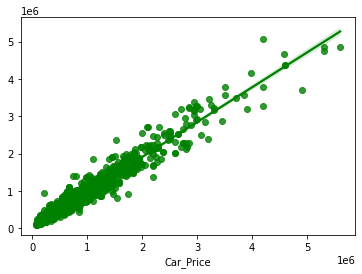

In [88]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 94.75%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.


## v) Extreme Gradient Boosting Regressor (XGB)

R2_Score: 96.93123490490557
Mean Absolute Error: 49790.17598421626
Mean Squared Error: 8009331695.2379675
Root Mean Squared Error: 89494.86965875735

Cross Validation Score: 93.51937312133423

R2 Score - Cross Validation Score is 3.4118617835713394


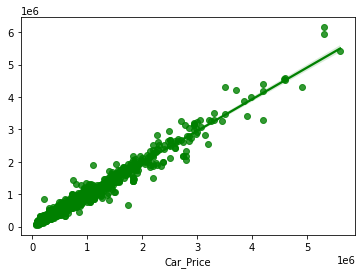

In [89]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 96.27%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## vi) Bagging Regressor

R2_Score: 95.47420449454083
Mean Absolute Error: 55905.19220402239
Mean Squared Error: 11812112124.836391
Root Mean Squared Error: 108683.54118649424

Cross Validation Score: 92.48815538957984

R2 Score - Cross Validation Score is 2.9860491049609834


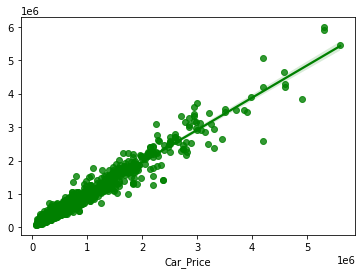

In [90]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 95.47%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.


## vii) KNeighbors Regressor

R2_Score: 89.49932344064041
Mean Absolute Error: 87735.10595065312
Mean Squared Error: 27406268965.573296
Root Mean Squared Error: 165548.38859249974

Cross Validation Score: 84.1283602282908

R2 Score - Cross Validation Score is 5.370963212349608


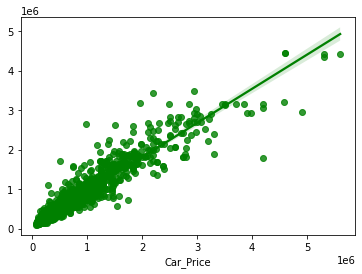

In [91]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

Created KNN Regressor model and checked for its evaluation metrics. The model is giving R2 score as 89.50%.

From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

##### The XGB Regressor has the least variation and the lowest evaluation metrics when compared to other models, as can be observed by the difference between R2 score and Cross Validation score. The best R2 score, MAE, MSE, and RMSE values were obtained using XGBoost as a regression model. Therefore, we may say that XGB Regressor is the model that fits data the best. Let's try to improve our model score by fine-tuning the top model with various hyperparameter kinds.

# Hyper Parameter Tuning

In [116]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

I Have used 4 XGBRegressor parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output.

In [115]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [107]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

Now we use our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [108]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.0, 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 200}

This gives us the list of parameters which will be used further in our final model creation.

R2_Score: 97.21913237189565
Mean absolute error: 46744.835697115384
Mean squared error: 7257932928.669445
Root Mean Squared error: 85193.50285479195


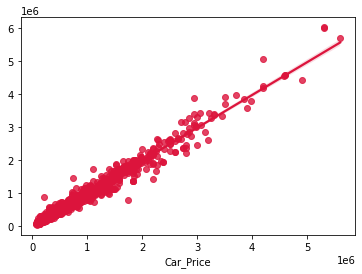

In [109]:
# Creating final model
Car_price_model = xgb(gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 97.21% which is very good.

From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given

# Saving the Final model

In [110]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl.

# Loading the saved model and predicting Used Car Price

In [111]:
# Loading the saved model
Model=joblib.load("Used_Car_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 378971.78, 1658736.8 ,  422942.22, ...,  544684.6 ,  194686.69,
        393240.06], dtype=float32)

These are the predicted price of the used cars.

# Creating DataFrame for the predicted values

In [112]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

0           1             2         3            4     \
Predicted  378971.78125  1658736.75  422942.21875  345976.5  537316.6875   
Original   379000.00000  1650000.00  465000.00000  435000.0  550000.0000   

                 5            6            7           8           9     \
Predicted  394835.125  619792.0625  619792.0625  1501986.25  662492.375   
Original   450000.000  550000.0000  550000.0000  1500000.00  643000.000   

                  10            11           12          13            14    \
Predicted  1021496.875  405670.09375  282785.3125  690405.125  290404.90625   
Original   1125000.000  385000.00000  325000.0000  705000.000  275000.00000   

               15           16          17        18           19        20    \
Predicted  465543.5  289411.3125  1620426.75  593755.5  563110.8125  645575.0   
Original   485000.0  265000.0000  1630000.00  550000.0  549000.0000  640000.0   

                   21           22         23            24          25    \
Predicted  361241.40625  610131.1875  389477.75  436890.40625  621214.375   
Original   365000.00000  553000.0000  424000.00  410000.00000  543000.000   

                   26            27         28          29          30    \
Predicted  424948.59375  303582.40625  157625.75  574227.625  885964.125   
Original   399000.00000  325000.00000  161000.00  613000.000  940000.000   

                  31           32            33           34            35    \
Predicted  321694.3125  544669.1875  356463.96875  611619.3125  286593.59375   
Original   299000.0000  550000.0000  345000.00000  640000.0000  250000.00000   

                   36           37             38            39    \
Predicted  399857.96875  888864.0625  218894.421875  436898.65625   
Original   429000.00000  915000.0000  230000.000000  392000.00000   

                  40            41            42           43         44    \
Predicted  883498.0625  315465.71875  518044.28125  1273024.625  2626845.0   
Original   864000.0000  335000.00000  536000.00000  1251000.000  3200000.0   

                 45            46            47           48          49    \
Predicted  389700.125  273555.65625  508223.65625  543811.0625  812090.125   
Original   440000.000  255000.00000  460000.00000  500000.0000  875000.000   

                50           51           52        53        54    \
Predicted  613654.25  346256.0625  279112.3125  640042.0  374655.5   
Original   536000.00  317000.0000  283000.0000  565000.0  399000.0   

                  55          56            57          58        59    \
Predicted  476249.5625  414132.125  370841.28125  381028.375  319924.5   
Original   472000.0000  426000.000  295000.00000  370000.000  363000.0   

                  60             61          62          63          64    \
Predicted  731357.0625  251886.828125  858325.875  684205.875  626790.375   
Original   825000.0000  240000.000000  950000.000  805000.000  576000.000   

                  65           66            67            68          69    \
Predicted  672540.3125  744811.8125  469927.53125  499928.78125  1258739.25   
Original   590000.0000  708000.0000  460000.00000  446000.00000  1375000.00   

                   70            71           72          73           74    \
Predicted  435021.03125  507815.78125  491462.0625  524944.875  665103.9375   
Original   410000.00000  553000.00000  486000.0000  480000.000  734000.0000   

                  75           76           77           78           79    \
Predicted  787586.4375  656243.0625  861600.6875  225843.1875  538348.1875   
Original   875000.0000  565000.0000  900000.0000  190000.0000  375000.0000   

                80            81           82           83        84    \
Predicted  691900.25  200102.53125  726424.9375  1078017.875  340480.0   
Original   670000.00  250000.00000  776000.0000  1075000.000  300000.0   

                    85            86           87            88         89    \
Predicted  258706.0468

Using regression model, we have got the predicted price of the used cars. From the above output we can observe that predicted values are almost near to the actual values.

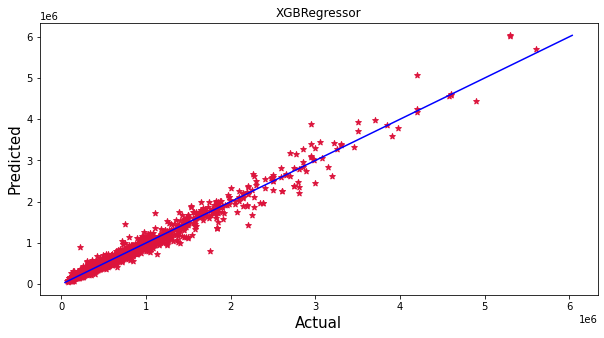

In [113]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [114]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

# Conclusion

##### Key Findings and Conclusion of the Study:

 -  The purpose of the case study is to provide an example of how machine learning algorithms can be utilised to forecast the sale price of used cars. After this project was finished, we gained knowledge about data collection, pre-processing, analysis, cleaning, and model construction.
 - First, we used Web scraping to gather information about used cars from the www.cardekho.com website. Selenium was the technology utilised for web scraping, which offers the benefit of automating our data collection process. We gathered roughly 12608 pieces of information, including the selling price of used cars and other relevant details. The scraped data was then saved in an excel file so we could use it later and analyse it.
 - Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
 - We learned from the visualisations that there is a significant positive linear relationship between the continuous numerical variables and the label "Car Price." We discovered that the automobiles with automatic gear transmission, those from Bangalore, those utilising gasoline and diesel as fuels, those with the brands Benz and BMW, and those with 5-7 seating capacity have high sale prices by comparing car prices and categorical data. When comparing continuous numerical variables and Car Price, we discovered that cars with good mileage, engine displacement, and less running kilometres have good linear relationships with the price, resulting in high selling prices for these types of vehicles.
 - After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor and KNeighbors Regressor.
 - We got XGBoost Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that XGBoost Regressor as the best algorithm as it was giving high R2 score after tuning.
 - After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.
 - Overall, we can say that this dataset is good for predicting the sale price of used cars using regression analysis and conclude that XGBoost Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.
